In [1]:
## This notebook handles the fingerprint calculation of microcystin with smiles notation

In [16]:
## rdkit import
from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem import AllChem ,Get3DDistanceMatrix,AssignStereochemistryFrom3D
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
from rdkit.Chem.rdmolops import AddHs
from pathlib import Path
from rdkit.Chem import PandasTools


## Utils import
import pandas as pd
import tqdm as tqdm

In [17]:
data = pd.read_excel("MC variants.xlsx")

In [19]:
data_with_smiles = data[~data["SMILES"].isna()]

In [21]:
data_with_smiles

,Microcystin,MF,MW,CAS number,SMILES
0,Microcystin-LR,C49H74N10O12,995.0,101043-37-2,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
1,Microcystin-RR,C49H75N13O12,1038.0,111755-37- 4,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
2,Microcystin-LA,C46H67N7O12,910.0,96180-79-9,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
3,Microcystin-YR,C52H72N10O13,1045.0,101064-48-6,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
4,Microcystin-LY,C52H71N7O13,1002.0,123304-10-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
5,Microcystin-LF,C52H71N7O12,986.0,154037-70-4,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
6,Microcystin LL,C49H73N7O12,952.0,154037-67-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
7,Microcystin-LW,C54H72N8O12,1025.0,157622-02-1,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
8,Microcystin YM,C51H69N7O13S,1020.0,101043-35-0,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
9,Microcystin WR,C54H73N11O12,1068.0,138234-58-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...


In [22]:
viz_table = data_with_smiles[["Microcystin","SMILES"]]

In [23]:
PandasTools.AddMoleculeColumnToFrame(viz_table,'SMILES','Molecule',)

C:\Users\saurav\anaconda3\envs\micro2\lib\site-packages\rdkit\Chem\PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Microcystin,SMILES,Molecule
0,Microcystin-LR,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
1,Microcystin-RR,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
2,Microcystin-LA,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
3,Microcystin-YR,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
4,Microcystin-LY,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
5,Microcystin-LF,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
6,Microcystin LL,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
7,Microcystin-LW,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
8,Microcystin YM,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
9,Microcystin WR,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,

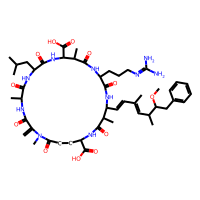
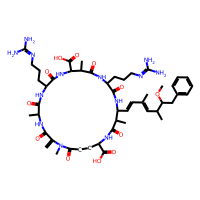
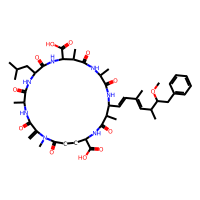
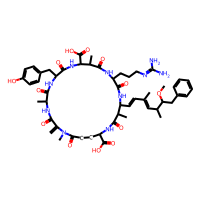
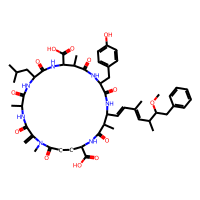
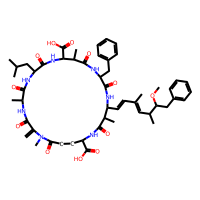
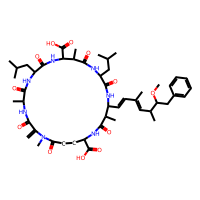
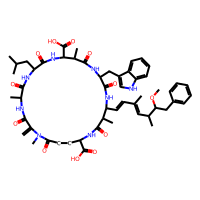
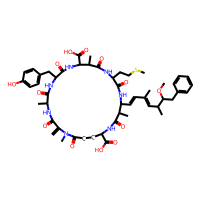
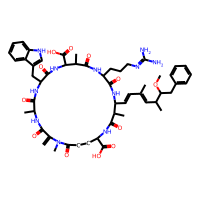
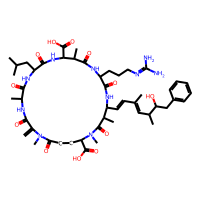
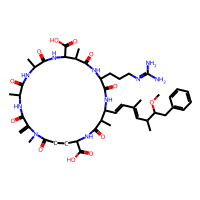
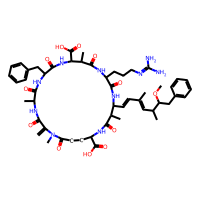
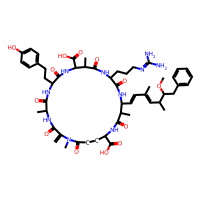

In [24]:
viz_table

In [25]:
def generate_pharmacophore(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    ## Add hydrogens before generating 3D co-ordinates of molecule
    #https://github.com/rdkit/rdkit/issues/466
    mol = AddHs(mol) ## add hydrogen
    AllChem.EmbedMolecule(mol,randomSeed=42) # calculate 3D conformation of molecule
    AllChem.MMFFOptimizeMoleculeConfs(mol, numThreads=12,ignoreInterfragInteractions =False)
    factory = Gobbi_Pharm2D.factory
    
    #https://sourceforge.net/p/rdkit/mailman/rdkit-discuss/thread/2E6EDA5BEFFB0D4F9C41C81BA77B17680171019D36@MBXP06.ds.man.ac.uk/
    fp = Generate.Gen2DFingerprint( mol, factory, dMat = Get3DDistanceMatrix(mol,force=True))
    
    return fp

In [26]:
data_with_smiles

,Microcystin,MF,MW,CAS number,SMILES
0,Microcystin-LR,C49H74N10O12,995.0,101043-37-2,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
1,Microcystin-RR,C49H75N13O12,1038.0,111755-37- 4,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
2,Microcystin-LA,C46H67N7O12,910.0,96180-79-9,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...
3,Microcystin-YR,C52H72N10O13,1045.0,101064-48-6,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
4,Microcystin-LY,C52H71N7O13,1002.0,123304-10-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
5,Microcystin-LF,C52H71N7O12,986.0,154037-70-4,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
6,Microcystin LL,C49H73N7O12,952.0,154037-67-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
7,Microcystin-LW,C54H72N8O12,1025.0,157622-02-1,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
8,Microcystin YM,C51H69N7O13S,1020.0,101043-35-0,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...
9,Microcystin WR,C54H73N11O12,1068.0,138234-58-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...


In [27]:
### calculate 3d pharmacophore fingerprint
data_with_smiles["pharmacophore"] = data_with_smiles["SMILES"].apply(generate_pharmacophore)

C:\Users\saurav\anaconda3\envs\micro2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data_with_smiles

,Microcystin,MF,MW,CAS number,SMILES,pharmacophore
0,Microcystin-LR,C49H74N10O12,995.0,101043-37-2,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,Microcystin-RR,C49H75N13O12,1038.0,111755-37- 4,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,Microcystin-LA,C46H67N7O12,910.0,96180-79-9,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,Microcystin-YR,C52H72N10O13,1045.0,101064-48-6,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ..."
4,Microcystin-LY,C52H71N7O13,1002.0,123304-10-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ..."
5,Microcystin-LF,C52H71N7O12,986.0,154037-70-4,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ..."
6,Microcystin LL,C49H73N7O12,952.0,154037-67-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ..."
7,Microcystin-LW,C54H72N8O12,1025.0,157622-02-1,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ..."
8,Microcystin YM,C51H69N7O13S,1020.0,101043-35-0,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, ..."
9,Microcystin WR,C54H73N11O12,1068.0,138234-58-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ..."


In [33]:
## Pharmacophore fingerprint size
import numpy as np
np.array(data_with_smiles["pharmacophore"][0]).shape

(39972,)

In [38]:
def calculate_morgan(smiles):
    radius = 2  # You can adjust the radius as needed
    num_bits = 2048  # Specify the number of bits in the fingerprint
    
    mol = Chem.MolFromSmiles(smiles)

    # Get the Morgan fingerprint
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=num_bits)
    
    return morgan_fp
    

In [39]:
## calculate the morgan fingerprint

In [40]:
data_with_smiles["morgan"] = data_with_smiles["SMILES"].apply(calculate_morgan)

C:\Users\saurav\anaconda3\envs\micro2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data_with_smiles

,Microcystin,MF,MW,CAS number,SMILES,pharmacophore,morgan
0,Microcystin-LR,C49H74N10O12,995.0,101043-37-2,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Microcystin-RR,C49H75N13O12,1038.0,111755-37- 4,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Microcystin-LA,C46H67N7O12,910.0,96180-79-9,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Microcystin-YR,C52H72N10O13,1045.0,101064-48-6,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Microcystin-LY,C52H71N7O13,1002.0,123304-10-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Microcystin-LF,C52H71N7O12,986.0,154037-70-4,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Microcystin LL,C49H73N7O12,952.0,154037-67-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Microcystin-LW,C54H72N8O12,1025.0,157622-02-1,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,Microcystin YM,C51H69N7O13S,1020.0,101043-35-0,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
9,Microcystin WR,C54H73N11O12,1068.0,138234-58-9,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
## create a matrix of tanimoto similarity

In [22]:
def calculate_tanimoto(fp1,fp2):
    
    return DataStructs.TanimotoSimilarity(fp1, fp2)

In [23]:
## Tanimoto score of pharmacophore

In [24]:
pharma = data_with_smiles[["Microcystin","pharmacophore"]]

In [25]:
# Create a matrix of Tanimoto similarity scores
num_rows = len(pharma)
similarity_matrix = pd.DataFrame(index=pharma['Microcystin'], columns=pharma['Microcystin'])

In [26]:
# Populate the matrix with Tanimoto similarity scores
from itertools import combinations

for pair in combinations(pharma['Microcystin'], 2):
    i, j = pair
    idx_i, idx_j = pharma[pharma['Microcystin'] == i].index[0], pharma[pharma['Microcystin'] == j].index[0]
    fp1, fp2 = pharma.at[idx_i, 'pharmacophore'], pharma.at[idx_j, 'pharmacophore']
    similarity_score = calculate_tanimoto(fp1, fp2)
    similarity_matrix.at[i, j] = similarity_score
    similarity_matrix.at[j, i] = similarity_score

In [27]:
similarity_matrix = similarity_matrix.fillna(1.0)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

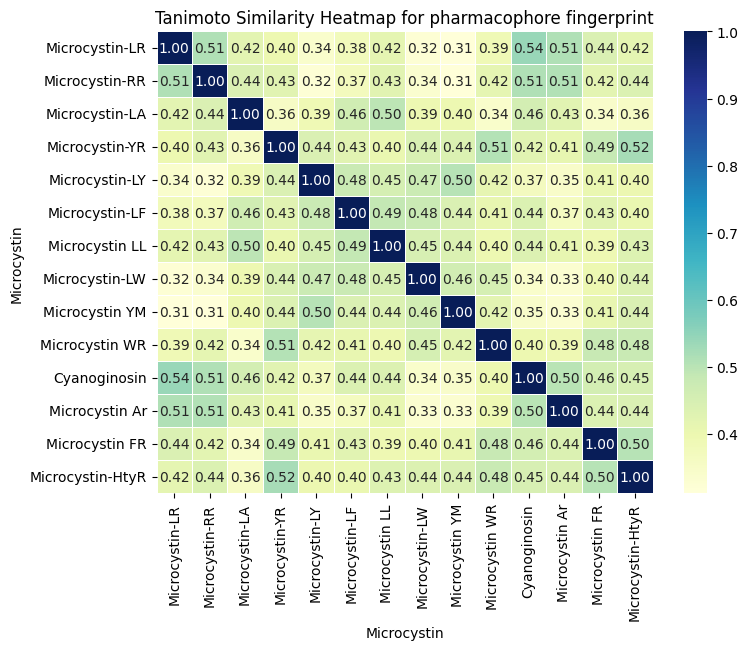

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Tanimoto Similarity Heatmap for pharmacophore fingerprint')
plt.show()

In [44]:
### Tanimoto score of morgan fingerprint

In [48]:
morgan = data_with_smiles[["Microcystin","morgan"]]

In [49]:
# Create a matrix of Tanimoto similarity scores
num_rows = len(morgan)
similarity_matrix = pd.DataFrame(index=morgan['Microcystin'], columns=morgan['Microcystin'])

In [50]:
# Populate the matrix with Tanimoto similarity scores
from itertools import combinations

for pair in combinations(pharma['Microcystin'], 2):
    i, j = pair
    idx_i, idx_j = morgan[morgan['Microcystin'] == i].index[0], morgan[morgan['Microcystin'] == j].index[0]
    fp1, fp2 = morgan.at[idx_i, 'morgan'], morgan.at[idx_j, 'morgan']
    similarity_score = calculate_tanimoto(fp1, fp2)
    similarity_matrix.at[i, j] = similarity_score
    similarity_matrix.at[j, i] = similarity_score

In [51]:
similarity_matrix = similarity_matrix.fillna(1.0)

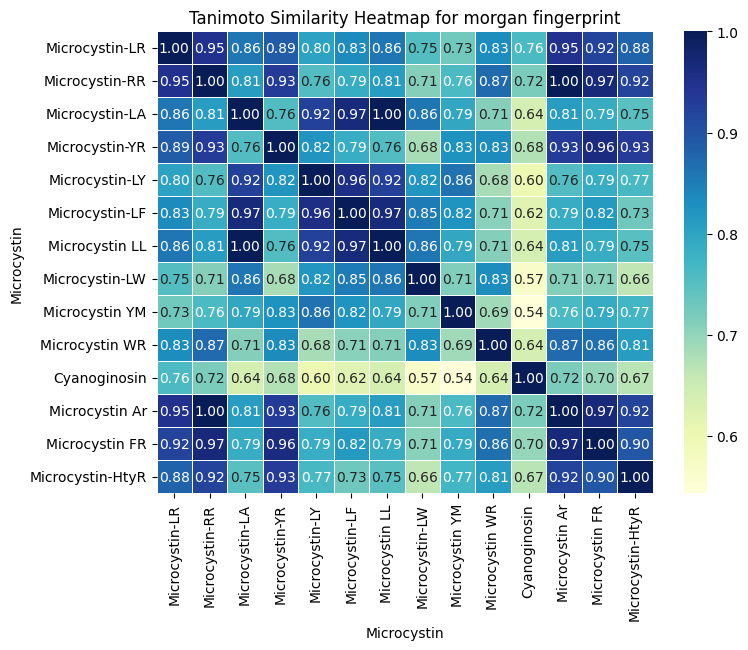

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Tanimoto Similarity Heatmap for morgan fingerprint')
plt.show()